In [1]:
import pandas as pd

In [2]:
train_data=pd.read_csv("train.csv", index_col = "Id")

In [3]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.shape

(1460, 80)

In [5]:
X = train_data.drop(["SalePrice"], axis = 1)
y = train_data.SalePrice

In [6]:
print(X.shape)
print(y.shape)

(1460, 79)
(1460,)


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
X.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [9]:
(X.isnull().sum() != 0).sum()

19

In [10]:
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ["int64", "float64"]]
categorical_cols = [cname for cname in X.columns if X[cname].nunique()<10 and X[cname].dtype == "object"]

In [11]:
my_cols = categorical_cols + numerical_cols

In [12]:
X_data = X[my_cols].copy()

In [13]:
X_data.shape

(1460, 76)

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
numirerical_transformer = SimpleImputer(strategy="median")

In [16]:
from sklearn.pipeline import Pipeline

In [17]:
from sklearn.preprocessing import OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [18]:
from sklearn.compose import ColumnTransformer

In [19]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numirerical_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

In [20]:
X_data_pre = preprocessor.fit_transform(X_data)

In [21]:
X_data_pre.shape

(1460, 232)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
model = RandomForestRegressor(n_estimators=100, random_state=1)

In [24]:
my_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2)

In [27]:
my_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath...
                                                 

In [28]:
preds_test = my_pipeline.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
mean_absolute_error(preds_test, y_test)

16961.5101369863

In [32]:
preds_train = my_pipeline.predict(X_train)

In [33]:
mean_absolute_error(preds_train, y_train)

6444.376344178082

In [36]:
from sklearn.model_selection import cross_val_score
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(n_estimators, random_state=1))
    ])
    scores = -1 * cross_val_score(my_pipeline, X_data, y, cv = 5, 
                   scoring = "neg_mean_absolute_error")
    return scores.mean()
    

In [37]:
result = {}
for i in range(2,8):
    result[50*i] = get_score(50*i)

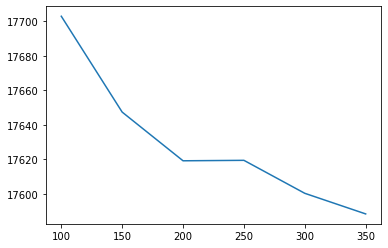

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(result.keys()), list(result.values()))
plt.show()

In [40]:
model = RandomForestRegressor(n_estimators=350, random_state=1)
my_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [43]:
my_pipeline.fit(X_data,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath...
                                                 

In [44]:
test_data = pd.read_csv("test.csv")

In [46]:
X_test = test_data[my_cols].copy()

In [47]:
preds_test = my_pipeline.predict(X_test)